In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import multivariate_normal as mvn

np.random.seed(2020)
sns.set_style("dark")

In [2]:
"""
Una clase para representar un VAR(1)

El trabajo se simplifica enormemente si creamos una clase para representar el VAR(1). En su implementación, definimos métodos para simularlo, determinar si es estable, y calcular la función de impulso respuesta. Para crear un objeto VAR(1), basta con pasarle a esta clase tres matrices: los interceptos, los coeficientes del rezago, y la varianza de los errores.
"""

class VAR1:
    def __init__(self,c,A,omega):
        self.c = np.asarray(c)
        self.A = np.asarray(A)
        self.omega = np.asarray(omega)
        self.n = self.c.size
        self.names = [name for name in 'xyzuvw'[:self.n]]
        self.shock = lambda : mvn(np.zeros(self.n), self.omega)

    def simulate(self, T=101):
        ''' Simula el VAR(1) T períodos'''
        X = np.zeros((T,self.n))
        try:
            X[0] = (np.linalg.inv(np.eye(2) - A) @ c).T
        except:
            pass

        for t in range(1, T):
            X[t] = self.c.T + X[t-1] @ self.A.T + self.shock()
        return pd.DataFrame(X, columns=self.names)

    def stability(self):
        ''' Determina la estabilidad del VAR a partir de los eigenvalores'''
        eigenvalues = np.linalg.eigvals(self.A)

        fig = plt.figure(figsize=[12,6])
        ax1 = fig.add_subplot(1, 2, 1, polar=True)
        ax1.plot(np.angle(eigenvalues), abs(eigenvalues),marker='o',linewidth=0)
        ax1.set(ylim=[0,1], yticks=[1], yticklabels=[''], xticks=np.arange(4)*np.pi/2)

        # tabla con eigenvalores
        # Nota > como texto para controlar su formato
        df = pd.DataFrame({'eigenvalor': [f'{𝜆:.3g}' for 𝜆 in eigenvalues],
                           'módulo': [f'{a:.3g}' for a in abs(eigenvalues)]})  

        ax2 = fig.add_subplot(1, 2, 2)
        ax2.axis('off')
        tbl = ax2.table(cellText = df.values,
                        colLabels = df.columns,
                        colColours = ['C0']*2,
                        bbox=[0, 0.25, 1, 0.5])
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(16)

    def irf(self, h=40, unit=True, plot=True, figsize=[12,6],**kwargs):
        ''' Calcula la función de impulso respuesta'''
        n = self.n

        impulse = np.eye(n) if unit else np.linalg.cholesky(self.omega)

        print('Los impulsos son ')
        for k in range(n):
            print(self.names[k],":  " ,impulse[:,k])

        X = np.zeros((h+1, n, n))
        X[0] = impulse
        for t in range(h):
            X[t+1] = self.A @ X[t]

        cols = [f'{y} --> {x}' for x in self.names for y in self.names]
        data = pd.DataFrame(X.reshape(h+1,n*n), columns=cols)
        if plot:
            data.plot(subplots=True, layout=(n,n), figsize=figsize,
                      title='Impulse-response function',**kwargs)
        else:
             return data   

    def analysis(self, T=101, h=40, unit=True, plot=True, **kwargs):
        ''' Analiza el VAR: estabilidad, simulación, impulso-respuesta'''
        self.stability()
        self.simulate(T).plot(title="Simulated VAR(1) process", figsize=[12,5])
        self.irf(h=h,unit=unit,plot=plot,**kwargs)

Los impulsos son 
x :   [1. 0.]
y :   [0. 1.]


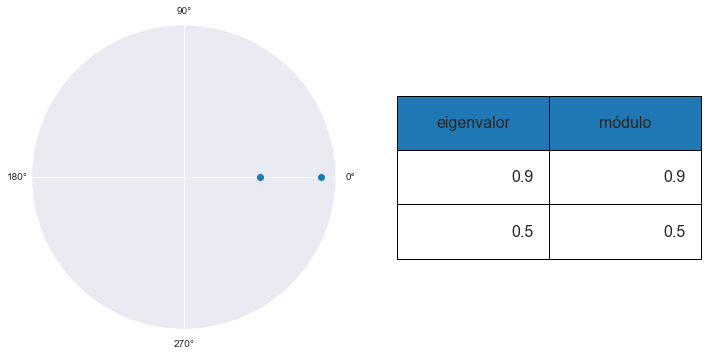

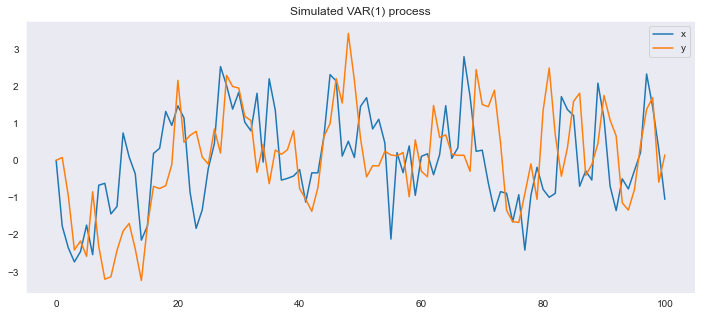

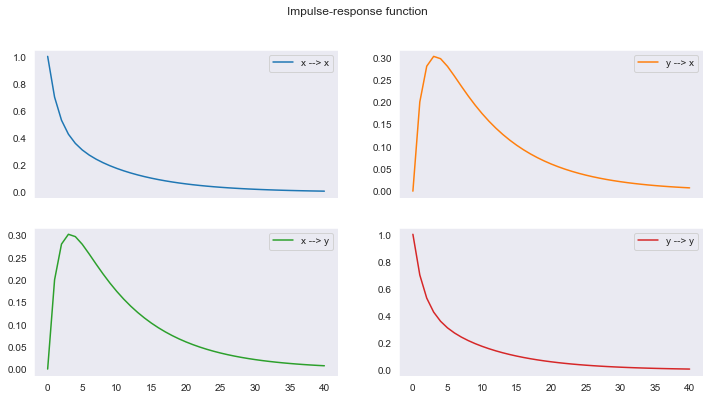

In [3]:
intercepto = [0, 0]
pendientes = [[0.7,0.2],[0.2, 0.7]]
omega = np.eye(2)

model1 = VAR1(intercepto,pendientes , omega)
model1.analysis()

Los impulsos son 
x :   [1. 0.]
y :   [0. 1.]


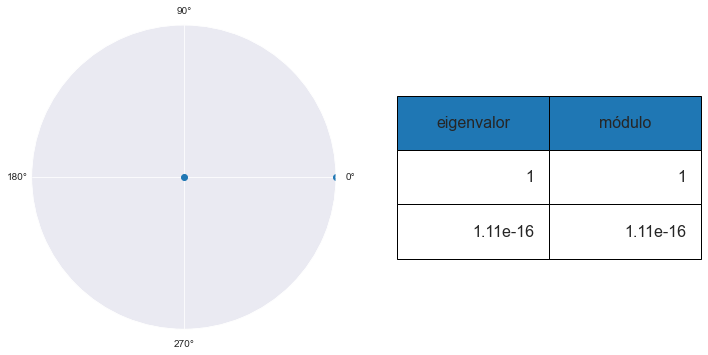

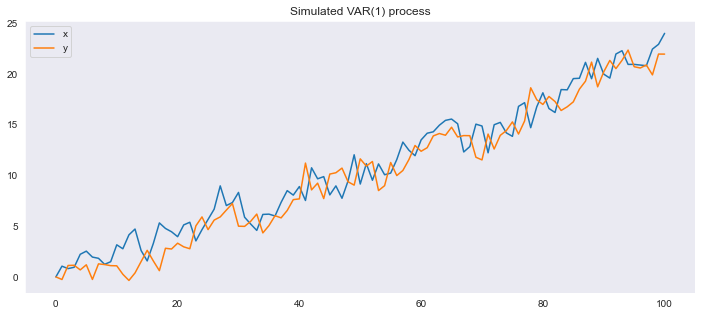

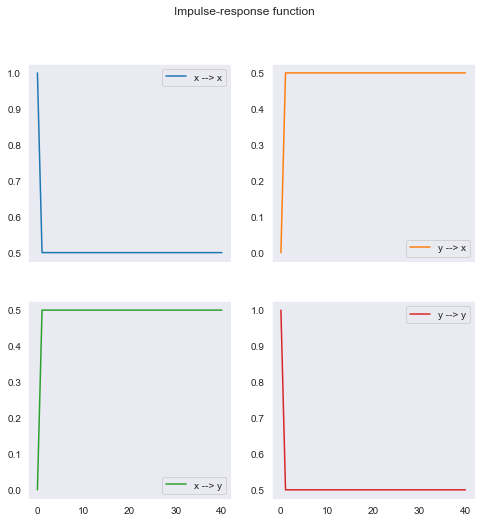

In [4]:
intercepto = [0.5, 0]
pendientes = [[0.5,0.5],[0.5, 0.5]]
omega = [[1,-0.4],[-0.4, 1]]

model2 = VAR1(intercepto, pendientes , omega)
model2.analysis(figsize=[8,8])

Los impulsos son 
x :   [1. 0.]
y :   [0. 1.]


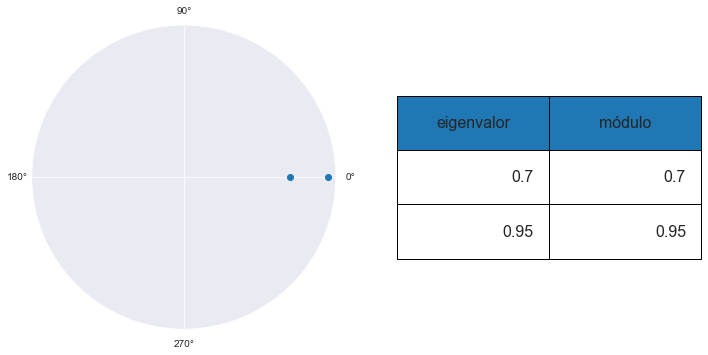

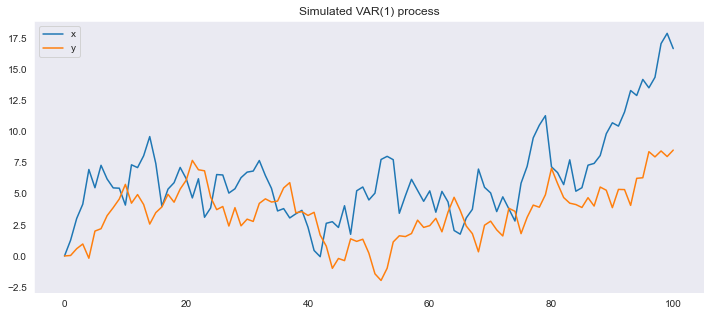

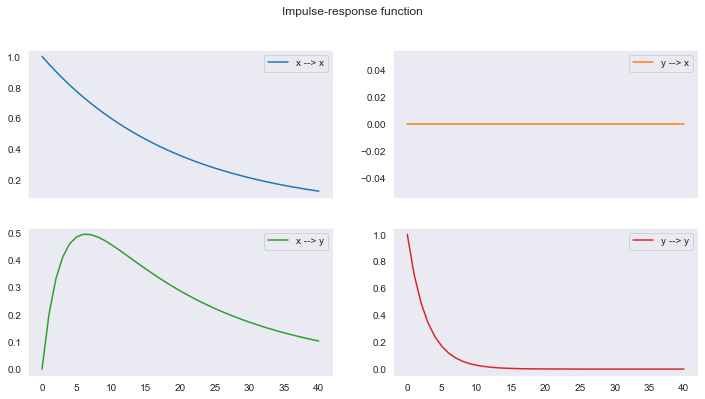

In [5]:
intercepto = [0.5, 0]
pendientes = [[0.95,0.0],[0.2, 0.7]]
omega = [[2,-0.4],[-0.4, 1]]

model3 = VAR1(intercepto,pendientes , omega)
model3.analysis()

Los impulsos son 
x :   [ 1.41421356 -0.28284271]
y :   [0.        0.9591663]


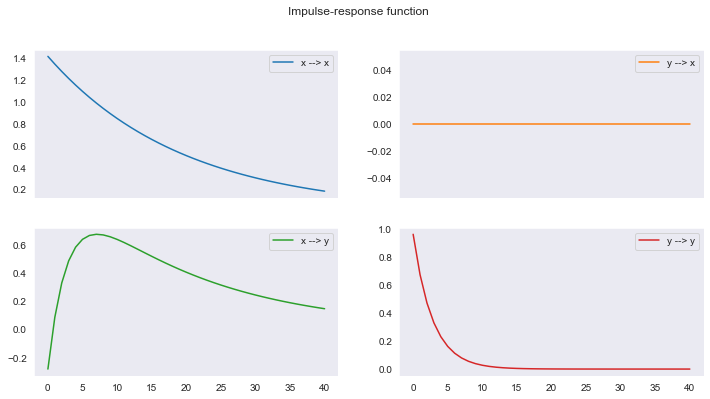

In [6]:
model3.irf(unit=False)

Los impulsos son 
x :   [ 1.   0.5 -1. ]
y :   [0.  2.  1.5]
z :   [0. 0. 3.]


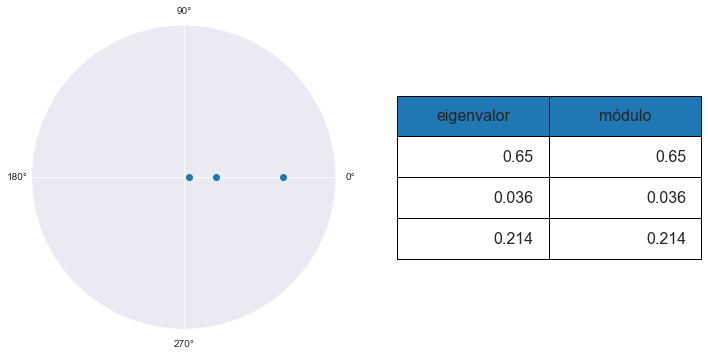

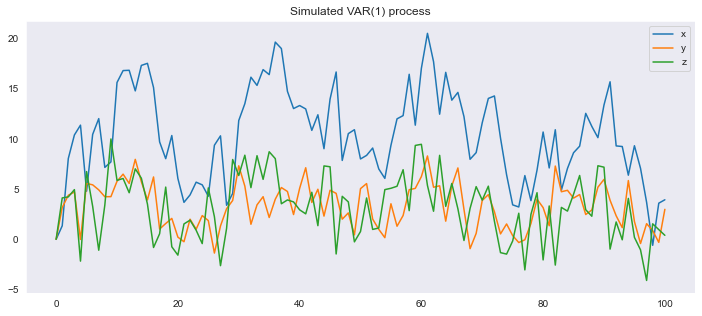

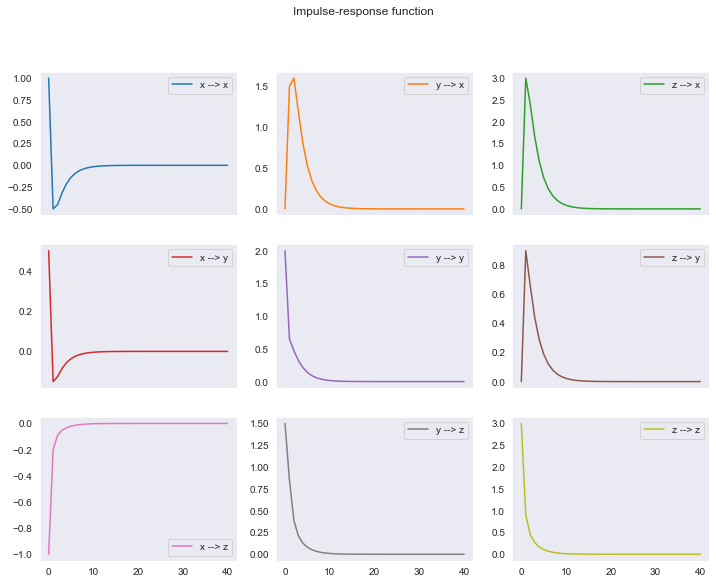

In [7]:
intercepto = [2, 1, 1.5]
pendientes = [[0.5,0, 1],[0.1, 0.1,0.3],[0,0.2,0.3]]
omega = [[1,0.5,-1],[0.5, 4.25, 2.5],[-1.00,2.5,12.25]]

model4 = VAR1(intercepto,pendientes , omega)
model4.analysis(figsize=[12,9], unit=False)

Los impulsos son 
x :   [ 1.   0.5 -1. ]
y :   [0.  2.  1.5]
z :   [0. 0. 3.]


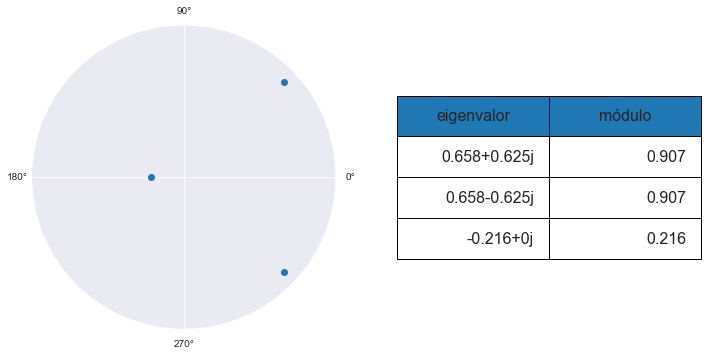

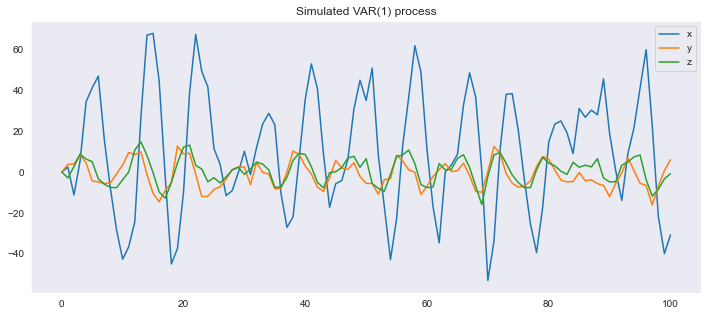

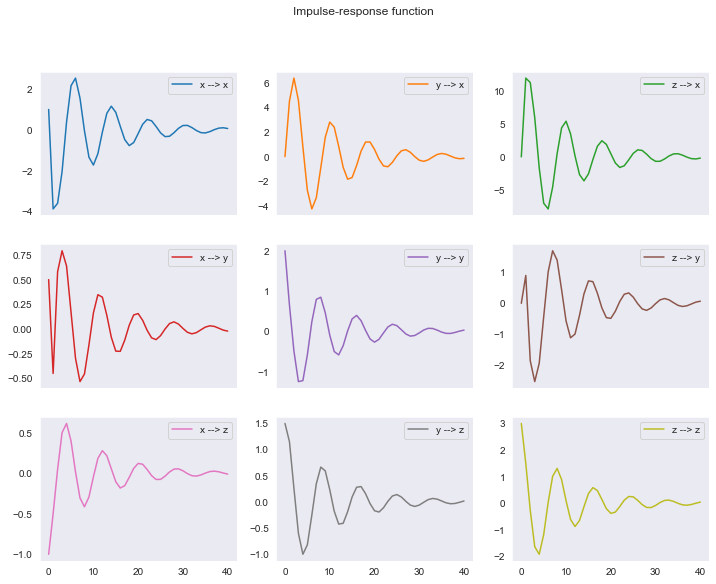

In [8]:
intercepto = [2, 1, 1.5]
omega = [[1,0.5,-1],[0.5, 4.25, 2.5],[-1.00,2.5,12.25]]

pendientes = [[0.5,-0.75, 4],[-0.2, 0.1,0.3],[-0.1,0.2,0.5]]
model5 = VAR1(intercepto,pendientes , omega)
model5.analysis(unit=False, figsize=[12,9])